In [374]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

import random as ramdom
randonSeed = ramdom.randint(0, 100)


In [375]:
def dijkstra(grafo, inicio, fim):
    # Inicializa as distâncias e a lista de prioridade
    start_time = time.time()

    distancias = {vertice: float('infinity') for vertice in grafo}
    distancias[inicio] = 0
    prioridade = [(0, inicio)]
    caminho = {vertice: None for vertice in grafo}
    
    while prioridade:
        # Encontra o vértice com a menor distância conhecida
        prioridade.sort()
        distancia_atual, vertice_atual = prioridade.pop(0)
        
        if vertice_atual == fim:
            break
        
        if distancia_atual > distancias[vertice_atual]:
            continue
        
        for vizinho, peso in grafo[vertice_atual]:
            distancia = distancia_atual + peso
            
            if distancia < distancias[vizinho]:
                distancias[vizinho] = distancia
                caminho[vizinho] = vertice_atual
                prioridade.append((distancia, vizinho))
    
    # Reconstrói o caminho
    caminho_final = []
    vertice = fim
    while vertice is not None:
        caminho_final.append(vertice)
        vertice = caminho[vertice]
    caminho_final.reverse()

    end_time = time.time()
    tempo_execucao = end_time - start_time
    
    print(distancias)
    print('\n')
    print(f"DJKISTRA:")
    print(f"O melhor caminho de {inicio} para {fim} é: {caminho_final} com distância total de {distancias[fim]}")
    print(f"O tempo de execução foi de {tempo_execucao:.8f} segundos")
    return tempo_execucao

In [376]:
import time

def bellman_ford(grafo, inicio, fim):
    start_time = time.time()
    # Inicializa as distâncias e o caminho
    distancias = {vertice: float('infinity') for vertice in grafo}
    distancias[inicio] = 0
    caminho = {vertice: None for vertice in grafo}
    
    # Relaxa as arestas |V| - 1 vezes
    for _ in range(len(grafo) - 1):
        for vertice in grafo:
            for vizinho, peso in grafo[vertice]:
                if distancias[vertice] + peso < distancias[vizinho]:
                    distancias[vizinho] = distancias[vertice] + peso
                    caminho[vizinho] = vertice
    
    # Verifica a presença de ciclos negativos
    for vertice in grafo:
        for vizinho, peso in grafo[vertice]:
            if distancias[vertice] + peso < distancias[vizinho]:
                raise ValueError("O grafo contém um ciclo negativo")
    
    # Reconstrói o caminho
    caminho_final = []
    vertice = fim
    while vertice is not None:
        caminho_final.append(vertice)
        vertice = caminho[vertice]
    caminho_final.reverse()
    
    end_time = time.time()
    tempo_execucao = end_time - start_time
    
    print(distancias)
    print('\n')
    print(f"BELMANN-FORD:")
    print(f"O melhor caminho de {inicio} para {fim} é: {caminho_final} com distância total de {distancias[fim]}")
    print(f"O tempo de execução foi de {tempo_execucao:.8f} segundos")
    return tempo_execucao

In [377]:
def plot_grafo(grafo, nome, seed):
    G = nx.DiGraph()  # Create a directed graph
    
    for node, edges in grafo.items():
        for edge in edges:
            G.add_edge(node, edge[0], weight=edge[1])
    
    pos = nx.spring_layout(G, seed=seed)  # Seed for reproducibility
    weights = nx.get_edge_attributes(G, 'weight')
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.savefig(nome + '.pdf', dpi=500)
    plt.show()


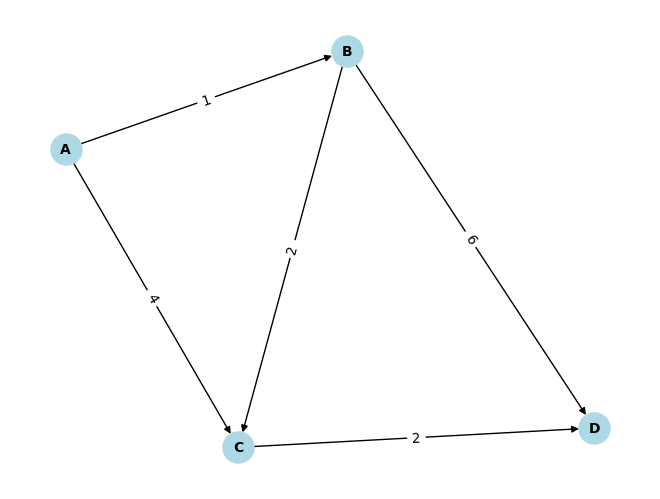

{'A': 0, 'B': 1, 'C': 3, 'D': 5}


DJKISTRA:
O melhor caminho de A para D é: ['A', 'B', 'C', 'D'] com distância total de 5
O tempo de execução foi de 0.00000000 segundos
{'A': 0, 'B': 1, 'C': 3, 'D': 5}


BELMANN-FORD:
O melhor caminho de A para D é: ['A', 'B', 'C', 'D'] com distância total de 5
O tempo de execução foi de 0.00000000 segundos


In [378]:
grafo1Direcionado = {'A': [('B', 1), ('C', 4)],
          'B': [('C', 2), ('D', 6)],
          'C': [('D', 2)],
          'D': []
         }    

plot_grafo(grafo1Direcionado, 'grafo1Direcionado', 4)


inicio = 'A'
fim = 'D'
tempo = dijkstra(grafo1Direcionado, inicio, fim)
tempo = bellman_ford(grafo1Direcionado, inicio, fim)



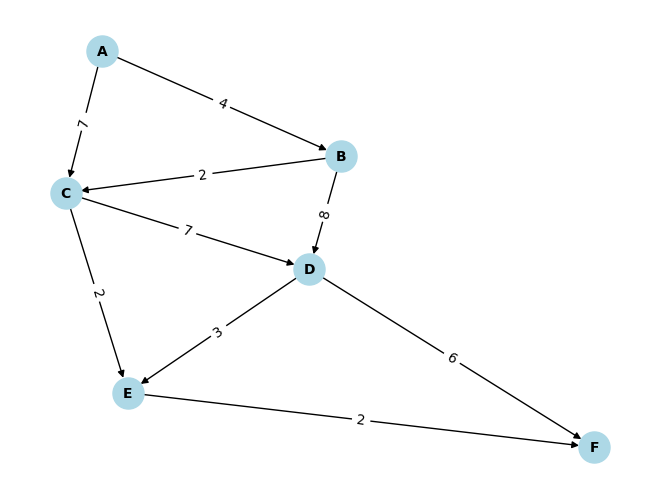

{'A': 0, 'B': 4, 'C': 6, 'D': 12, 'E': 8, 'F': 10}


DJKISTRA:
O melhor caminho de A para F é: ['A', 'B', 'C', 'E', 'F'] com distância total de 10
O tempo de execução foi de 0.00000000 segundos
{'A': 0, 'B': 4, 'C': 6, 'D': 12, 'E': 8, 'F': 10}


BELMANN-FORD:
O melhor caminho de A para F é: ['A', 'B', 'C', 'E', 'F'] com distância total de 10
O tempo de execução foi de 0.00000000 segundos


In [379]:
grafo2Direcionado = {
    'A': [('B', 4), ('C', 7)],
    'B': [('C', 2), ('D', 8)],
    'C': [('D', 7), ('E', 2)],
    'D': [('E', 3), ('F', 6)],
    'E': [('F', 2)],
    'F': []
}

plot_grafo(grafo2Direcionado, 'grafo2Direcionado', 24) #11

inicio = 'A'
fim = 'F'
tempo = dijkstra(grafo2Direcionado, inicio, fim)
tempo = bellman_ford(grafo2Direcionado, inicio, fim)


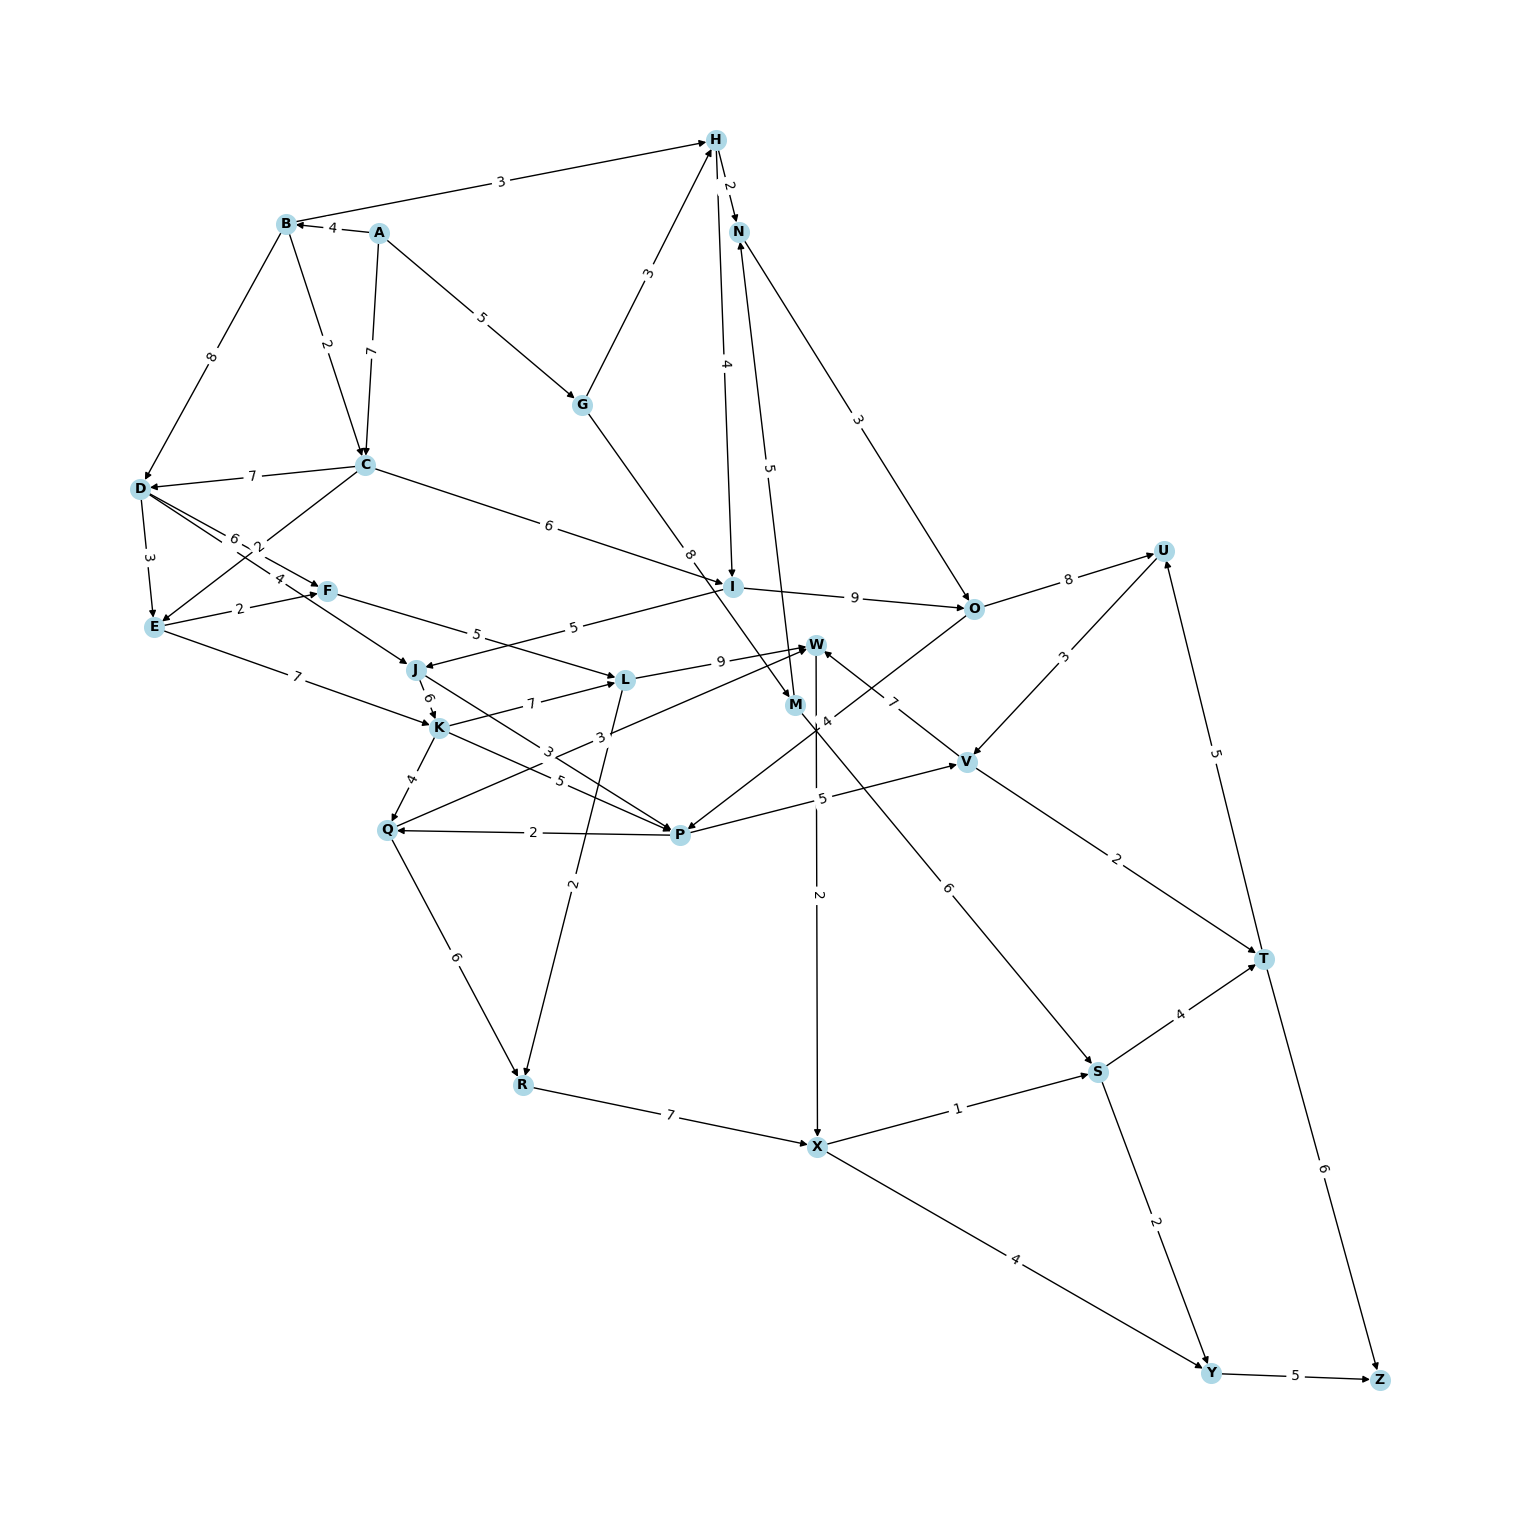

{'A': 0, 'B': 4, 'C': 6, 'D': 12, 'E': 8, 'F': 10, 'G': 5, 'H': 7, 'I': 11, 'J': 16, 'K': 15, 'L': 15, 'M': 13, 'N': 9, 'O': 12, 'P': 16, 'Q': 18, 'R': 17, 'S': 19, 'T': 23, 'U': 20, 'V': 21, 'W': 21, 'X': 23, 'Y': 21, 'Z': 26}


DJKISTRA:
O melhor caminho de A para Z é: ['A', 'G', 'M', 'S', 'Y', 'Z'] com distância total de 26
O tempo de execução foi de 0.00000000 segundos
{'A': 0, 'B': 4, 'C': 6, 'D': 12, 'E': 8, 'F': 10, 'G': 5, 'H': 7, 'I': 11, 'J': 16, 'K': 15, 'L': 15, 'M': 13, 'N': 9, 'O': 12, 'P': 16, 'Q': 18, 'R': 17, 'S': 19, 'T': 23, 'U': 20, 'V': 21, 'W': 21, 'X': 23, 'Y': 21, 'Z': 26}


BELMANN-FORD:
O melhor caminho de A para Z é: ['A', 'G', 'M', 'S', 'Y', 'Z'] com distância total de 26
O tempo de execução foi de 0.00000000 segundos


In [380]:
grafo3Direcionado = {
    'A': [('B', 4), ('C', 7), ('G', 5)],
    'B': [('C', 2), ('D', 8), ('H', 3)],
    'C': [('D', 7), ('E', 2), ('I', 6)],
    'D': [('E', 3), ('F', 6), ('J', 4)],
    'E': [('F', 2), ('K', 7)],
    'F': [('L', 5)],
    'G': [('H', 3), ('M', 8)],
    'H': [('I', 4), ('N', 2)],
    'I': [('J', 5), ('O', 9)],
    'J': [('K', 6), ('P', 3)],
    'K': [('L', 7), ('Q', 4), ('P', 5)],
    'L': [('R', 2), ('W', 9)],
    'M': [('N', 5), ('S', 6)],
    'N': [('O', 3)],
    'O': [('P', 4), ('U', 8)],
    'P': [('Q', 2), ('V', 5)],
    'Q': [('R', 6), ('W', 3)],
    'R': [('X', 7)],
    'S': [('T', 4), ('Y', 2)],
    'T': [('U', 5), ('Z', 6)],
    'U': [('V', 3)],
    'V': [('T', 2),('W', 7)],
    'W': [('X', 2)],
    'X': [('S', 1),('Y', 4) ],
    'Y': [('Z', 5)],
    'Z': []
}

def plot_grafo(grafo, nome, seed):
    G = nx.DiGraph()  # Create a directed graph
    
    for node, edges in grafo.items():
        for edge in edges:
            G.add_edge(node, edge[0], weight=edge[1])
    
    pos = nx.spring_layout(G, seed=seed)  # Seed for reproducibility
    weights = nx.get_edge_attributes(G, 'weight')
    
    plt.figure(figsize=(15, 15))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.savefig(nome + '.pdf', dpi=500)
    plt.show()



plot_grafo(grafo3Direcionado, 'grafo3Direcionado', 0) #11

inicio = 'A'
fim = 'Z'
tempo = dijkstra(grafo3Direcionado, inicio, fim)
tempo = bellman_ford(grafo3Direcionado, inicio, fim)

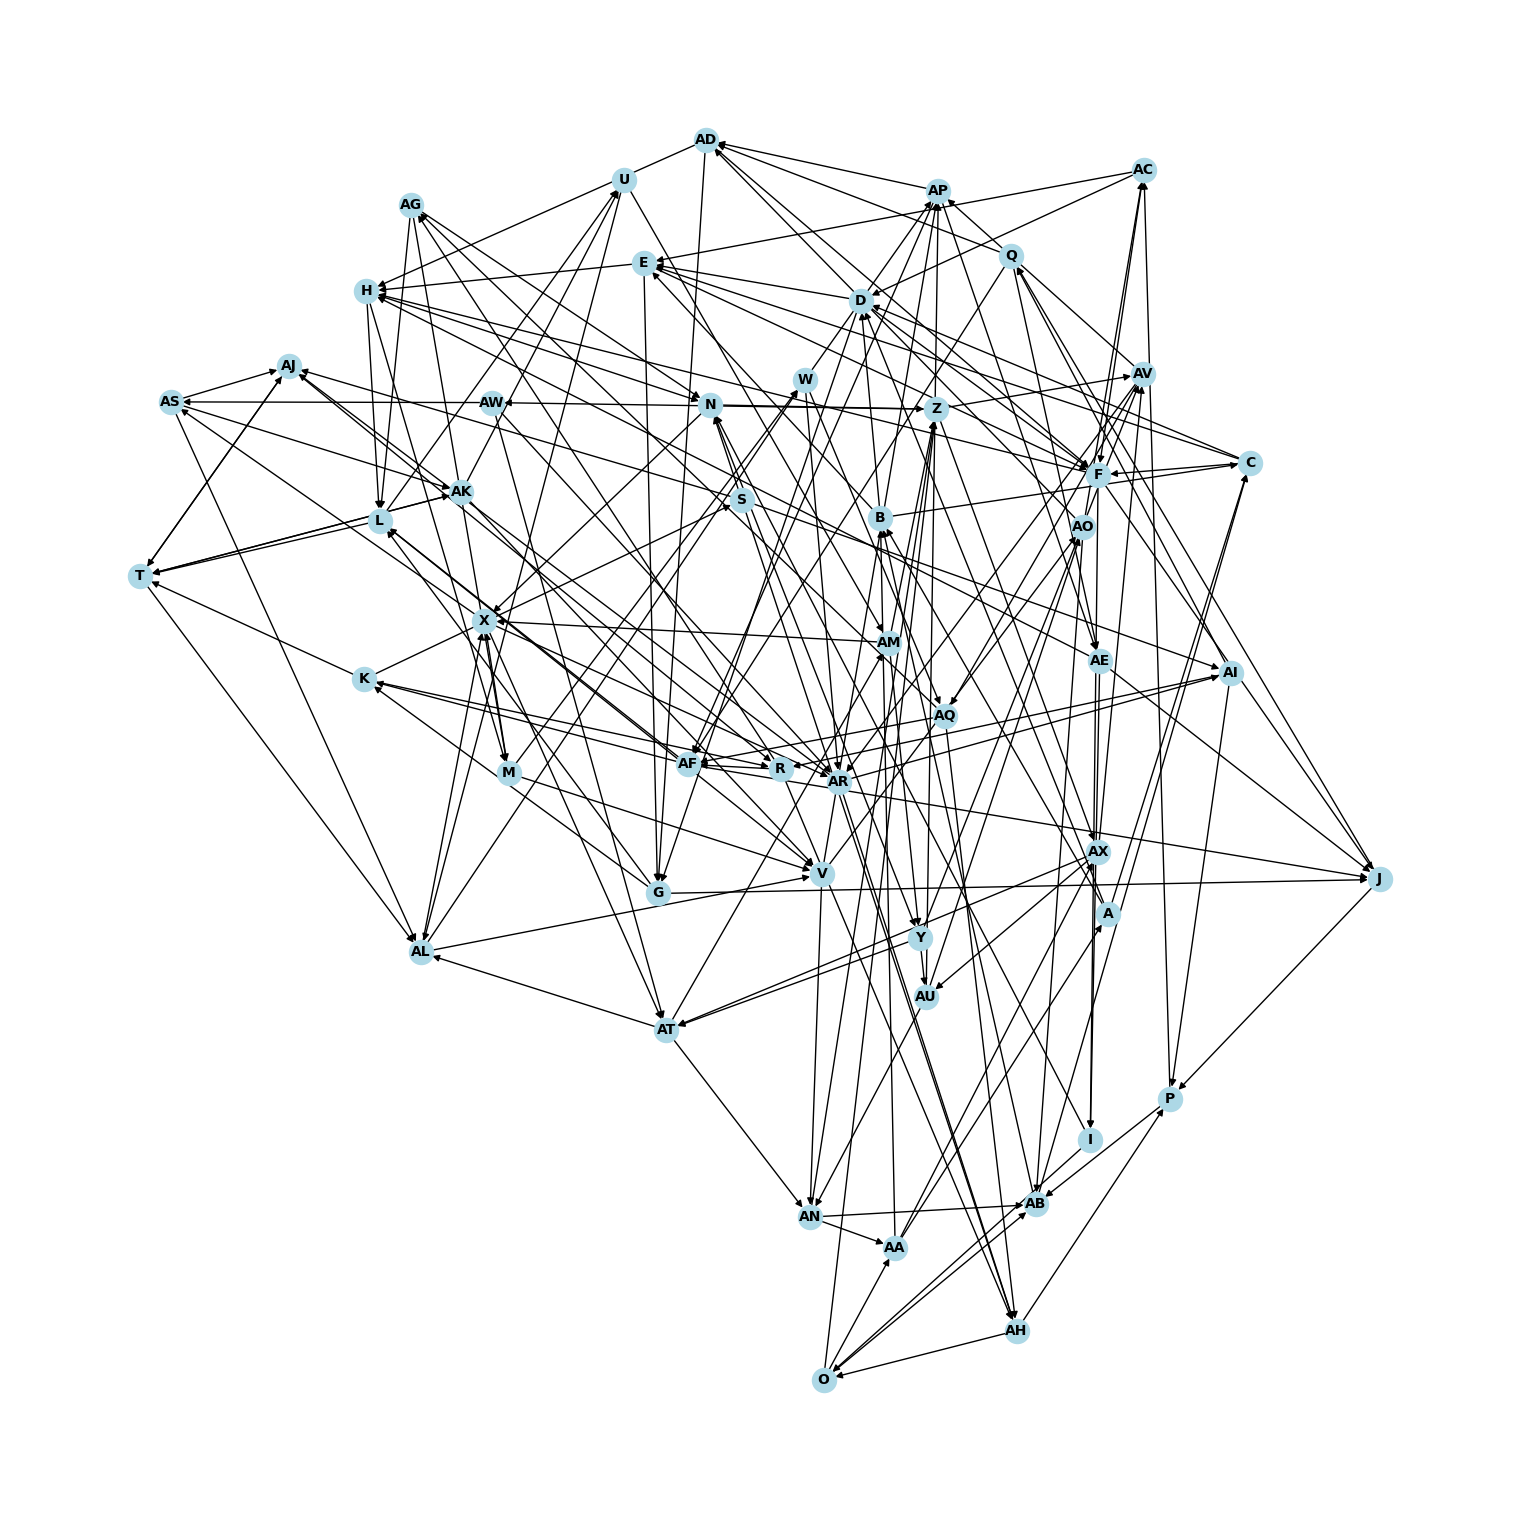

{'A': 0, 'B': 8, 'C': 12, 'D': 10, 'E': 17, 'F': 20, 'G': 21, 'H': 25, 'I': 26, 'J': 29, 'K': 33, 'L': 32, 'M': 38, 'N': 32, 'O': 40, 'P': 36, 'Q': 39, 'R': 41, 'S': 45, 'T': 41, 'U': 45, 'V': 42, 'W': 52, 'X': 39, 'Y': 42, 'Z': 45, 'AA': 55, 'AB': 45, 'AC': 49, 'AD': 45, 'AE': 53, 'AF': 51, 'AG': 50, 'AH': 52, 'AI': 57, 'AJ': 50, 'AK': 54, 'AL': 51, 'AM': 58, 'AN': 49, 'AO': 52, 'AP': 54, 'AQ': 58, 'AR': 48, 'AS': 52, 'AT': 48, 'AU': 56, 'AV': 52, 'AW': 55, 'AX': 58}


DJKISTRA:
O melhor caminho de A para AX é: ['A', 'D', 'F', 'I', 'N', 'Z', 'AX'] com distância total de 58
O tempo de execução foi de 0.00000000 segundos
{'A': 0, 'B': 8, 'C': 12, 'D': 10, 'E': 17, 'F': 20, 'G': 21, 'H': 25, 'I': 26, 'J': 29, 'K': 33, 'L': 32, 'M': 38, 'N': 32, 'O': 40, 'P': 36, 'Q': 39, 'R': 41, 'S': 45, 'T': 41, 'U': 45, 'V': 42, 'W': 52, 'X': 39, 'Y': 42, 'Z': 45, 'AA': 55, 'AB': 45, 'AC': 49, 'AD': 45, 'AE': 53, 'AF': 51, 'AG': 50, 'AH': 52, 'AI': 57, 'AJ': 50, 'AK': 54, 'AL': 51, 'AM': 58, 'AN': 49,

In [381]:
grafo4Direcionado = {
    'A': [('B', 8), ('C', 12), ('D', 10)],
    'B': [('C', 6), ('D', 13), ('E', 9)],
    'C': [('D', 12), ('E', 6), ('F', 10)],
    'D': [('E', 15), ('F', 10), ('G', 11)],
    'E': [('F', 6), ('G', 9), ('H', 8)],
    'F': [('H', 7), ('I', 6), ('J', 10)],
    'G': [('J', 8), ('K', 12), ('L', 11)],
    'H': [('L', 15), ('M', 13), ('N', 12)],
    'I': [('N', 6), ('O', 14)],
    'J': [('P', 7), ('Q', 10)],
    'K': [('R', 8), ('S', 12), ('T', 13)],
    'L': [('T', 9), ('U', 13), ('V', 10)],
    'M': [('V', 6), ('W', 14), ('X', 12)],
    'N': [('X', 7), ('Y', 10), ('Z', 13)],
    'O': [('Z', 8), ('AA', 15), ('AB', 12)],
    'P': [('AB', 9), ('AC', 13)],
    'Q': [('AD', 6), ('AE', 14), ('AF', 12)],
    'R': [('AF', 15), ('AG', 9), ('AH', 11)],
    'S': [('AI', 12), ('AJ', 10)],
    'T': [('AJ', 9), ('AK', 13), ('AL', 12)],
    'U': [('AL', 6), ('AM', 14)],
    'V': [('AN', 7), ('AO', 10), ('AP', 12)],
    'W': [('AP', 8), ('AQ', 6), ('AR', 11)],
    'X': [('AR', 9), ('AS', 13), ('AT', 12)],
    'Y': [('AT', 6), ('AU', 14), ('AV', 11)],
    'Z': [('AV', 7), ('AW', 10), ('AX', 13)],
    'AA': [('AX', 8), ('A', 12), ('B', 11)],
    'AB': [('B', 9), ('C', 9)],
    'AC': [('D', 6), ('E', 14), ('F', 11)],
    'AD': [('F', 7), ('G', 9), ('H', 12)],
    'AE': [('H', 8), ('I', 12), ('J', 13)],
    'AF': [('J', 9), ('K', 13), ('L', 12)],
    'AG': [('L', 6), ('M', 14), ('N', 11)],
    'AH': [('N', 7), ('O', 10), ('P', 12)],
    'AI': [('P', 8), ('Q', 12), ('R', 11)],
    'AJ': [('R', 9), ('T', 12)],
    'AK': [('T', 6), ('U', 14), ('V', 11)],
    'AL': [('V', 7), ('W', 6), ('X', 10)],
    'AM': [('X', 5), ('Y', 12), ('Z', 13)],
    'AN': [('Z', 9), ('AA', 13), ('AB', 10)],
    'AO': [('AB', 6), ('AC', 14), ('AD', 12)],
    'AP': [('AD', 7), ('AE', 10), ('AF', 11)],
    'AQ': [('AF', 8), ('AG', 8), ('AH', 13)],
    'AR': [('AH', 9), ('AI', 13), ('AJ', 10)],
    'AS': [('AJ', 6), ('AK', 14), ('AL', 12)],
    'AT': [('AL', 7), ('AM', 10), ('AN', 11)],
    'AU': [('AN', 7), ('AO', 12), ('AP', 10)],
    'AV': [('AP', 9), ('AQ', 13), ('AR', 12)],
    'AW': [('AR', 6), ('AS', 14), ('AT', 10)],
    'AX': [('AT', 7), ('AU', 10), ('AV', 12)]
}



def plot_grafo(grafo, nome, seed):
    G = nx.DiGraph()  # Create a directed graph
    
    for node, edges in grafo.items():
        for edge in edges:
            G.add_edge(node, edge[0], weight=edge[1])
    
    pos = nx.spring_layout(G, seed=seed)  # Seed for reproducibility
    weights = nx.get_edge_attributes(G, 'weight')
    
    plt.figure(figsize=(15, 15))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10, font_weight='bold')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.savefig(nome + '.pdf', dpi=500)
    plt.show()


plot_grafo(grafo4Direcionado, 'grafo4Direcionado', 91) #11
inicio = 'A'
fim = 'AX'
tempo = dijkstra(grafo4Direcionado, inicio, fim)
tempo = bellman_ford(grafo4Direcionado, inicio, fim)

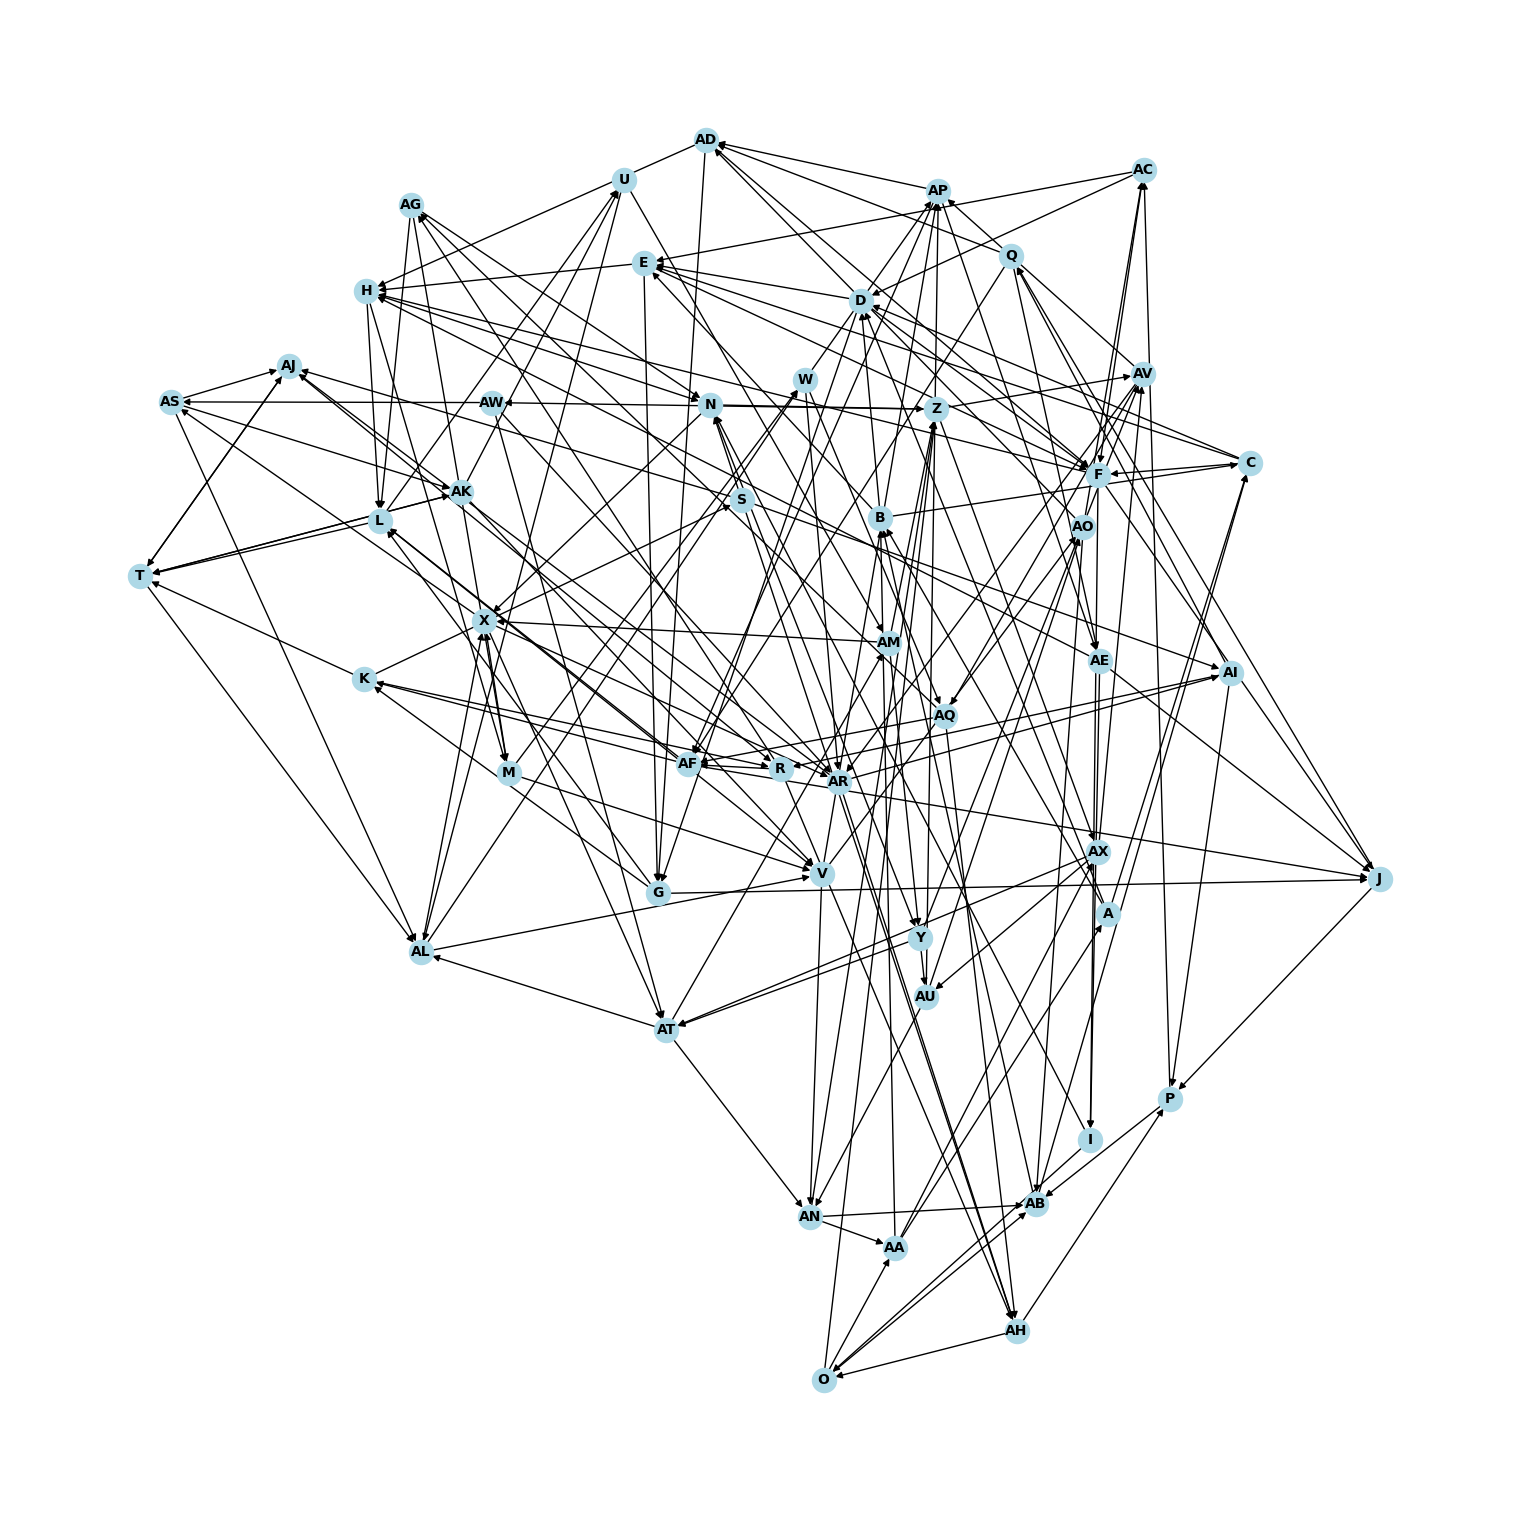

{'A': 0, 'B': 8, 'C': 12, 'D': 10, 'E': 17, 'F': 20, 'G': 21, 'H': 25, 'I': 26, 'J': 29, 'K': 33, 'L': 32, 'M': 38, 'N': 32, 'O': 40, 'P': 36, 'Q': 39, 'R': 41, 'S': 45, 'T': 41, 'U': 45, 'V': 42, 'W': 52, 'X': 39, 'Y': 42, 'Z': 45, 'AA': 55, 'AB': 45, 'AC': 49, 'AD': 45, 'AE': 53, 'AF': 51, 'AG': 50, 'AH': 52, 'AI': 57, 'AJ': 50, 'AK': 54, 'AL': 51, 'AM': 58, 'AN': 49, 'AO': 52, 'AP': 54, 'AQ': 58, 'AR': 48, 'AS': 52, 'AT': 48, 'AU': 56, 'AV': 52, 'AW': 55, 'AX': 58}


DJKISTRA:
O melhor caminho de A para AX é: ['A', 'D', 'F', 'I', 'N', 'Z', 'AX'] com distância total de 58
O tempo de execução foi de 0.00100946 segundos
{'A': 0, 'B': 8, 'C': 12, 'D': 10, 'E': 17, 'F': 20, 'G': 21, 'H': 25, 'I': 26, 'J': 29, 'K': 33, 'L': 32, 'M': 38, 'N': 32, 'O': 40, 'P': 36, 'Q': 39, 'R': 41, 'S': 45, 'T': 41, 'U': 45, 'V': 42, 'W': 52, 'X': 39, 'Y': 42, 'Z': 45, 'AA': 55, 'AB': 45, 'AC': 49, 'AD': 45, 'AE': 53, 'AF': 51, 'AG': 50, 'AH': 52, 'AI': 57, 'AJ': 50, 'AK': 54, 'AL': 51, 'AM': 58, 'AN': 49,

In [382]:
grafo4Direcionado = {
    'A': [('B', 8), ('C', 12), ('D', 10)],
    'B': [('C', 6), ('D', 13), ('E', 9)],
    'C': [('D', 12), ('E', 6), ('F', 10)],
    'D': [('E', 15), ('F', 10), ('G', 11)],
    'E': [('F', 6), ('G', 9), ('H', 8)],
    'F': [('H', 7), ('I', 6), ('J', 10)],
    'G': [('J', 8), ('K', 12), ('L', 11)],
    'H': [('L', 15), ('M', 13), ('N', 12)],
    'I': [('N', 6), ('O', 14)],
    'J': [('P', 7), ('Q', 10)],
    'K': [('R', 8), ('S', 12), ('T', 13)],
    'L': [('T', 9), ('U', 13), ('V', 10)],
    'M': [('V', 6), ('W', 14), ('X', 12)],
    'N': [('X', 7), ('Y', 10), ('Z', 13)],
    'O': [('Z', 8), ('AA', 15), ('AB', 12)],
    'P': [('AB', 9), ('AC', 13)],
    'Q': [('AD', 6), ('AE', 14), ('AF', 12)],
    'R': [('AF', 15), ('AG', 9), ('AH', 11)],
    'S': [('AI', 12), ('AJ', 10)],
    'T': [('AJ', 9), ('AK', 13), ('AL', 12)],
    'U': [('AL', 6), ('AM', 14)],
    'V': [('AN', 7), ('AO', 10), ('AP', 12)],
    'W': [('AP', 8), ('AQ', 6), ('AR', 11)],
    'X': [('AR', 9), ('AS', 13), ('AT', 12)],
    'Y': [('AT', 6), ('AU', 14), ('AV', 11)],
    'Z': [('AV', 7), ('AW', 10), ('AX', 13)],
    'AA': [('AX', 8), ('A', 12), ('B', 11)],
    'AB': [('B', 9), ('C', 9)],
    'AC': [('D', 6), ('E', 14), ('F', 11)],
    'AD': [('F', 7), ('G', 9), ('H', 12)],
    'AE': [('H', 8), ('I', 12), ('J', 13)],
    'AF': [('J', 9), ('K', 13), ('L', 12)],
    'AG': [('L', 6), ('M', 14), ('N', 11)],
    'AH': [('N', 7), ('O', 10), ('P', 12)],
    'AI': [('P', 8), ('Q', 12), ('R', 11)],
    'AJ': [('R', 9), ('T', 12)],
    'AK': [('T', 6), ('U', 14), ('V', 11)],
    'AL': [('V', 7), ('W', 6), ('X', 10)],
    'AM': [('X', 5), ('Y', 12), ('Z', 13)],
    'AN': [('Z', 9), ('AA', 13), ('AB', 10)],
    'AO': [('AB', 6), ('AC', 14), ('AD', 12)],
    'AP': [('AD', 7), ('AE', 10), ('AF', 11)],
    'AQ': [('AF', 8), ('AG', 8), ('AH', 13)],
    'AR': [('AH', 9), ('AI', 13), ('AJ', 10)],
    'AS': [('AJ', 6), ('AK', 14), ('AL', 12)],
    'AT': [('AL', 7), ('AM', 10), ('AN', 11)],
    'AU': [('AN', 7), ('AO', 12), ('AP', 10)],
    'AV': [('AP', 9), ('AQ', 13), ('AR', 12)],
    'AW': [('AR', 6), ('AS', 14), ('AT', 10)],
    'AX': [('AT', 7), ('AU', 10), ('AV', 12)]
}



def plot_grafo(grafo, nome, seed):
    G = nx.DiGraph()  # Create a directed graph
    
    for node, edges in grafo.items():
        for edge in edges:
            G.add_edge(node, edge[0], weight=edge[1])
    
    pos = nx.spring_layout(G, seed=seed)  # Seed for reproducibility
    weights = nx.get_edge_attributes(G, 'weight')
    
    plt.figure(figsize=(15, 15))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10, font_weight='bold')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.savefig(nome + '.pdf', dpi=500)
    plt.show()


plot_grafo(grafo4Direcionado, 'grafo4Direcionado', 91) #11
inicio = 'A'
fim = 'AX'
tempo = dijkstra(grafo4Direcionado, inicio, fim)
tempo = bellman_ford(grafo4Direcionado, inicio, fim)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

grafo5Direcionado = {}
vertices = [f'V{i}' for i in range(1, 1001)]

for vertice in vertices:
    num_arestas = random.randint(3, 10)
    destinos = random.sample(vertices, num_arestas)
    if vertice in destinos:
        destinos.remove(vertice)
    grafo5Direcionado[vertice] = [(dest, random.randint(5, 20)) for dest in destinos]


inicio = 'V1'
num_vertices = len(grafo5Direcionado)
print(f"O número de vértices no grafo é: {num_vertices}")

fim = 'V200'
tempo = dijkstra(grafo5Direcionado, 'V1', 'V200')
tempo = bellman_ford(grafo5Direcionado, 'V1', 'V200')


{'V1': [('V504', 18), ('V691', 14), ('V229', 18), ('V529', 15)], 'V2': [('V703', 16), ('V920', 19), ('V937', 20), ('V133', 7), ('V1000', 10), ('V772', 8), ('V120', 5)], 'V3': [('V212', 17), ('V415', 5), ('V564', 7)], 'V4': [('V123', 10), ('V810', 18), ('V245', 6), ('V481', 15), ('V263', 20), ('V620', 13)], 'V5': [('V170', 17), ('V6', 15), ('V822', 17), ('V333', 17)], 'V6': [('V755', 9), ('V587', 14), ('V435', 16), ('V946', 15), ('V950', 10), ('V300', 11)], 'V7': [('V581', 8), ('V485', 6), ('V62', 20), ('V383', 13), ('V682', 6), ('V572', 18), ('V18', 19)], 'V8': [('V883', 18), ('V770', 15), ('V949', 10), ('V236', 13)], 'V9': [('V598', 19), ('V924', 9), ('V93', 16), ('V398', 14), ('V706', 8), ('V451', 20), ('V547', 20), ('V317', 14), ('V828', 11)], 'V10': [('V990', 9), ('V750', 16), ('V638', 7)], 'V11': [('V435', 11), ('V109', 7), ('V492', 13), ('V725', 15)], 'V12': [('V790', 18), ('V13', 9), ('V684', 6), ('V672', 7), ('V579', 19), ('V327', 13), ('V624', 16), ('V993', 13), ('V770', 8), (